In [1]:
%matplotlib inline

from __future__ import division, print_function
from sympy import Symbol, diff, solve, lambdify, simplify
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Model parameters: We look for a line y = b1*x + b2.
b1 = Symbol('b1')
b2 = Symbol('b2')

In [3]:
# Data points
data = [(1,14), (2, 13), (3, 12), (4, 10), (5,9), (7,8), (9,5)]

In [4]:
# S is the function to minimize:
#
# For each data point the vertical error/residual is x*b1 + b2 - y. We want to
# minimize the sum of the squared residuals (least squares).
S = sum((p[0] * b1 + b2 - p[1]) ** 2 for p in data)
S = simplify(S)
print("Function to minimize: S = {}".format(S))


Function to minimize: S = 185*b1**2 + 62*b1*b2 - 524*b1 + 7*b2**2 - 142*b2 + 779


In [5]:
# Minimize S by setting its partial derivatives to zero.
d1 = diff(S, b1)
d2 = diff(S, b2)
solutions = solve([d1, d2], [b1, b2])
print("S is minimal for b1 = {}, b2 = {}".format(solutions[b1], solutions[b2]))

S is minimal for b1 = -367/334, b2 = 5013/334


In [6]:
# Construct fitted line from the solutions
x = Symbol('x')
fitted_line = solutions[b1] * x + solutions[b2]
print("Fitted line: y = {}".format(fitted_line))


Fitted line: y = -367*x/334 + 5013/334


In [7]:
# Construct something we can plot with matplotlib
fitted_line_func = lambdify(x, fitted_line, modules=['numpy'])
x_plot = np.linspace(min(p[0] for p in data),
                     max(p[0] for p in data), 100)


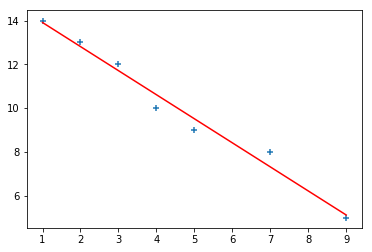

In [8]:
# Plot data points and fitted line
plt.scatter([p[0] for p in data], [p[1] for p in data], marker="+")
plt.plot(x_plot, fitted_line_func(x_plot), 'r')
plt.show()